# Text mining for the collected works of H.P. Lovecraft

We have a dataset of raw text consisting of the collected works renowned horror fiction writer H.P. Lovecraft. The goal of this notebook is to explore and find interesting patterns in the text.

In [1]:
%matplotlib inline  # Need to do this to show matplotlib graphs in the jupyter notebook

In [2]:
import re  # Contains regular expression functions

In [3]:
with open("../data/hp-lovecraft.txt", "r", encoding = 'utf-8') as f:
    # Read the text file
    text = f.read()

In [4]:
# Show the first 500 characters in the text file
print(text[:500])

11 



H. P Lovecraf t 



Cthulu Mythos 



Collected works 



11 



Introduction 

This is a book that contains stories written by Howard Phihps Lovecraft that is 
beheved to be in the pubhc domain and were downloaded from the web. It was 
not created for profit - only for the purpose of having the stories in a singular 
location so as to be readily available for reading. The cover image is a 'doctored' 
photo that I took at Saint Kevin's Monastery, Ireland. The image was altered 
using the 


In [5]:
# Split the text file into words
word_list = text.split()

In [6]:
"There are {} words in the collected works of H.P. Lovecraft (before cleaning)".format(len(word_list))

'There are 632679 words in the collected works of H.P. Lovecraft (before cleaning)'

In [7]:
# the for loop way
dirty_words = []
for word in word_list:
    if not re.search('[A-z]', word):
        # it's a word
        dirty_words.append(word.lower())

print("The first 20 words in the text containing no letters")
print(", ".join(dirty_words[:20]))

The first 20 words in the text containing no letters
11, 11, -, 1, 5, 8, 92, 93, 102, 107, 114, 119, 149, 151, 159, 165, 174, 199, 205, 209


In [8]:
# use a list comprehension to get the good words - this way is easier
words = [word.lower() for word in word_list if re.search('[A-z]', word)]

In [9]:
# Remove punctuation
words = [re.sub('[^a-z]', '', word) for word in words]

In [10]:
"There are {} words in the collected works of H.P. Lovecraft (after cleaning)".format(len(words))

'There are 624880 words in the collected works of H.P. Lovecraft (after cleaning)'

## Word counts

We want to count the number of occurences for each word in the collected works of H.P. Lovecraft

In [11]:
import nltk
nltk.download('stopwords')   # Download the stopwords list (if you don't have it already)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from nltk.corpus import stopwords

# Clean the punctuation from the stop words so it matches the clean text
stop_words = [re.sub('[^a-z]', '', word) for word in stopwords.words('english')]

# Add a few extra stop words
stop_words += ['could', 'would', 'though', 'must', 'like']

# Changing stop_words to a set makes looping a bit faster
stop_words = set(stop_words)

We count the number of occurences for each word using a dictionary, and try-except. The idea is to check if each word is in the dictionary, and if it isn't, set the count to 1. Otherwise, we increment the existing count by 1.

We also check if the word is a stop word, and if it is, we skip and go to the next word.

In [13]:
word_counts = {}
for word in words:
    if word in stop_words:
        continue
    try:
        word_counts[word] += 1
    except KeyError:
        word_counts[word] = 1

# Visualise the results

In [14]:
import pandas as pd

The easiest way to visualise the word counts is to convert the `word_count` dict to a pandas `Series`, which has all of the methods we need to arrange and plot the word counts. We show this below:

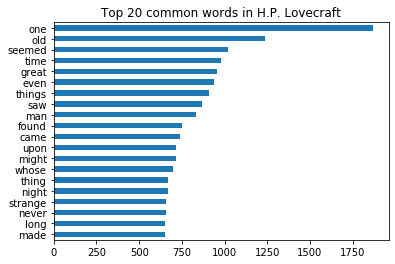

In [15]:
(pd.Series(word_counts)   # Convert to pd.Series
     .sort_values()       # Sort the words in descending order
     .tail(20)            # Take the bottom 20 elements (this is the top 20 words by word count)
     .plot(kind = 'barh', # Plot the counts - ('barh' means horizontal bar graph)
           title = 'Top 20 common words in H.P. Lovecraft')
)